Exploratory Data Analysis (EDA)
1. Understanding Data Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status We will start with basic exploratory data analysis (EDA), followed by applying some simple predictie modelling.

Please focus on understanding the high-level concepts first before figuring out the details of the code (you will get used to the coding part with practice).

Sections labeled Exercises are self-practice sections (with help from your trainer). You can use the results of these sections for your report.
Similarly, there are suggestive questions throughout the report that might take deeper investigation and thought. Your answers would be useful for both your reports and future job interviews

### Import libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Change the path to point to your data location
filepath = "/content/drive/MyDrive/Bản sao của healthcare-dataset-stroke-data.csv"

# Read the CSV file into a Pandas DataFrame
stroke_data = pd.read_csv(filepath)

# Print the DataFrame
print(stroke_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [44]:
stroke_data.shape

(5110, 12)

In [45]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [46]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [47]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

- Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Exercises:**
- Which columns are numerical and which ones are categorical?
- Why is it important to analyze numerical and non-numerical columns separatey?
* Answer in Vietnamese:
Trả lời:Tại sao cần phân tích riêng các cột số và cột phân loại?
Bản chất của dữ liệu:

Các cột số chứa giá trị định lượng liên tục hoặc rời rạc và có thể được sử dụng trực tiếp trong các phép toán như tính trung bình, độ lệch chuẩn, mối tương quan, v.v.
Các cột phân loại đại diện cho dữ liệu định tính và cần mã hóa (chẳng hạn như one-hot encoding, label encoding) để sử dụng trong các mô hình học máy.
Các phương pháp phân tích khác nhau:

Dữ liệu số:
Sử dụng các thống kê tóm tắt (trung bình, trung vị, mode, khoảng giá trị, độ lệch chuẩn) để hiểu xu hướng trung tâm và độ phân tán.
Trực quan hóa bằng biểu đồ histogram, boxplot hoặc scatterplot.
Dữ liệu phân loại:
Sử dụng tần suất hoặc tỷ lệ phần trăm để tóm tắt.
Trực quan hóa bằng biểu đồ cột (bar plot), biểu đồ tròn (pie chart), hoặc heatmap để thấy mối quan hệ.
Tiền xử lý:

Dữ liệu số:
Có thể cần chuẩn hóa hoặc tiêu chuẩn hóa (chẳng hạn như Min-Max Scaling hoặc Standardization).
Dữ liệu phân loại:
Có thể cần mã hóa (như one-hot encoding hoặc ordinal encoding) để chuyển đổi sang định dạng số phù hợp cho tính toán.
Tầm quan trọng và diễn giải đặc trưng (feature importance):

Trong các mô hình học máy, dữ liệu số và phân loại có thể ảnh hưởng khác nhau đến hành vi của mô hình và cần các kỹ thuật chọn đặc trưng khác nhau (ví dụ: tương quan cho dữ liệu số và kiểm định chi-square cho dữ liệu phân loại).
Xử lý dữ liệu bị thiếu:

Dữ liệu số bị thiếu thường được thay thế bằng trung bình, trung vị hoặc nội suy (regression imputation).
Dữ liệu phân loại bị thiếu có thể được thay thế bằng giá trị phổ biến nhất (mode), thêm hạng mục “Không rõ” (Unknown) hoặc sử dụng các mô hình dự đoán.
Việc phân tích riêng biệt giúp áp dụng đúng phương pháp cho từng loại dữ liệu, từ đó mang lại kết quả tốt hơn và mô hình hoạt động hiệu quả hơn.


# 2. Formulate Data Questions (Hypothesis)

- What interesting insights can be gained from data?
- What questions can be interesting to the stakeholders?
- Answer in Vietnamese
** Xây dựng câu hỏi dựa trên dữ liệu (Formulate Data Questions )
    một số giả thuyết và câu hỏi dựa trên dữ liệu được cung cấp

1. Yếu tố nguy cơ sức khỏe
Giả thuyết: Bệnh nhân bị tăng huyết áp hoặc bệnh tim có nguy cơ đột quỵ cao hơn.
Câu hỏi:
Tỷ lệ đột quỵ thay đổi như thế nào giữa bệnh nhân có và không có tăng huyết áp?
Có mối tương quan đáng kể nào giữa bệnh tim và đột quỵ không?
2. Phân tích nhân khẩu học
Giả thuyết: Tuổi tác và tình trạng hôn nhân ảnh hưởng đến nguy cơ đột quỵ.
Câu hỏi:
Tỷ lệ đột quỵ có tăng theo độ tuổi không? Nếu có, nguy cơ bắt đầu tăng đáng kể từ độ tuổi nào?
Người đã kết hôn có nguy cơ đột quỵ cao hơn hay thấp hơn so với người chưa kết hôn?
3. Lối sống và hành vi
Giả thuyết: Tình trạng hút thuốc và chỉ số BMI (chỉ số khối cơ thể) ảnh hưởng đến nguy cơ đột quỵ.
Câu hỏi:
Người hút thuốc có nguy cơ đột quỵ cao hơn so với người không hút thuốc không?
Người có chỉ số BMI cao có đối mặt với nguy cơ đột quỵ cao hơn không?
4. Yếu tố kinh tế - xã hội
Giả thuyết: Loại công việc và nơi cư trú đóng vai trò trong tỷ lệ đột quỵ.
Câu hỏi:
Loại công việc nào có tỷ lệ đột quỵ cao nhất (ví dụ: công việc chính phủ, tư nhân)?
Có sự khác biệt đáng kể nào về tỷ lệ đột quỵ giữa cư dân nông thôn và thành thị không?
5. Bệnh tiểu đường và mức đường huyết
Giả thuyết: Mức đường huyết trung bình cao là một yếu tố dự đoán đột quỵ.
Câu hỏi:
Có ngưỡng mức đường huyết nào mà trên đó nguy cơ đột quỵ tăng đáng kể không?
Tỷ lệ đột quỵ thay đổi như thế nào trong các khoảng mức đường huyết khác nhau?
6. Tương tác giữa nhiều yếu tố
Giả thuyết: Nguy cơ đột quỵ bị ảnh hưởng bởi sự kết hợp của nhiều yếu tố như tuổi, tăng huyết áp và hút thuốc.
Câu hỏi:
Người cao tuổi bị tăng huyết áp có nguy cơ đột quỵ cao hơn đáng kể so với người trẻ bị tăng huyết áp không?
Tình trạng hút thuốc và mức đường huyết cao kết hợp với nhau ảnh hưởng đến khả năng đột quỵ như thế nào?
7. Hoàn thiện dữ liệu
Giả thuyết: Thiếu dữ liệu về tình trạng hút thuốc có thể ẩn giấu những thông tin quan trọng liên quan đến lối sống.
Câu hỏi:
Phân bố tỷ lệ đột quỵ khác nhau như thế nào giữa những người có thông tin hút thuốc và những người không có thông tin hút thuốc?
Nhóm "Không rõ" có tương quan với bất kỳ nhóm nhân khẩu học hoặc sức khỏe cụ thể nào không?

- Thông tin hữu ích cho các bên liên quan
Nhà cung cấp dịch vụ y tế:
Những bệnh nhân nào cần được ưu tiên chăm sóc phòng ngừa dựa trên các yếu tố nguy cơ?
Người lập chính sách:
Có sự chênh lệch về nguy cơ đột quỵ giữa khu vực nông thôn và thành thị cần được giải quyết không?
Nhà tuyển dụng:
Nhân viên ở những loại công việc cụ thể có nguy cơ gặp vấn đề sức khỏe như đột quỵ không, điều này cho thấy cần có các chương trình chăm sóc sức khỏe tại nơi làm việc?
Công ty bảo hiểm:
Những yếu tố nhân khẩu học hoặc liên quan đến sức khỏe nào cần được cân nhắc để xây dựng mô hình đánh giá rủi ro tốt hơn?
Những câu hỏi này có thể giúp các bên liên quan khám phá các mẫu dữ liệu hữu ích, ưu tiên các biện pháp can thiệp và phân bổ nguồn lực một cách hiệu quả hơn.

# 3. Exploratory Data Analysis

Before we start, let's revise some concepts related to distributions:
- What is a distribution?
- What is the range of a distribution?
- What are  quartiles and inter-quartile range?
- What are mean, mode, medians values?
- Answer in Vietnamese:
    mode: cái có tần số xuất hiện nhiều nhất
    mean: trung bình cộng
    medians: ở giữa
1. Phân phối là gì?
Định nghĩa:
+ Phân phối mô tả cách các giá trị trong tập dữ liệu được phân bố hoặc sắp xếp. Nó thể hiện tần suất hoặc xác suất các giá trị khác nhau xuất hiện.
+ Các loại phân phối:
    Phân phối chuẩn (Normal Distribution): Dạng hình chuông đối xứng, với hầu hết các điểm dữ liệu tập trung quanh giá trị trung bình.
    Phân phối lệch (Skewed Distribution): Dữ liệu phân bố không đối xứng, lệch về bên phải (lệch dương) hoặc bên trái (lệch âm).
    Phân phối đồng đều (Uniform Distribution): Các giá trị xuất hiện với tần suất bằng nhau.
+ Mục đích:
Hiểu được phân phối giúp xác định các mẫu, cụm, giá trị ngoại lai, và hành vi tổng thể của dữ liệu.
2. Khoảng giá trị của phân phối là gì?
Định nghĩa:
+ Khoảng giá trị (Range) là chênh lệch giữa giá trị nhỏ nhất và giá trị lớn nhất trong tập dữ liệu.
Công thức:

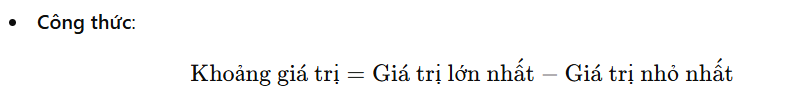
+ Mục đích:
Cung cấp một thước đo đơn giản về độ phân tán của dữ liệu.
Tuy nhiên, khoảng giá trị có thể gây hiểu lầm nếu tập dữ liệu có các giá trị ngoại lai vì chỉ dựa vào giá trị cực đại và cực tiểu.
3. Tứ phân vị và Khoảng tứ phân vị (Inter-Quartile Range - IQR)
+ Tứ phân vị (Quartiles):
Tứ phân vị chia tập dữ liệu thành bốn phần bằng nhau khi sắp xếp theo thứ tự tăng dần:
    Q1 (Tứ phân vị thứ nhất): 25% dữ liệu nằm dưới giá trị này.
    Q2 (Tứ phân vị thứ hai/Trung vị): 50% dữ liệu nằm dưới giá trị này.
    Q3 (Tứ phân vị thứ ba): 75% dữ liệu nằm dưới giá trị này.
+ Khoảng tứ phân vị (IQR):
Đo lường độ phân tán của 50% dữ liệu ở giữa.
Công thức:

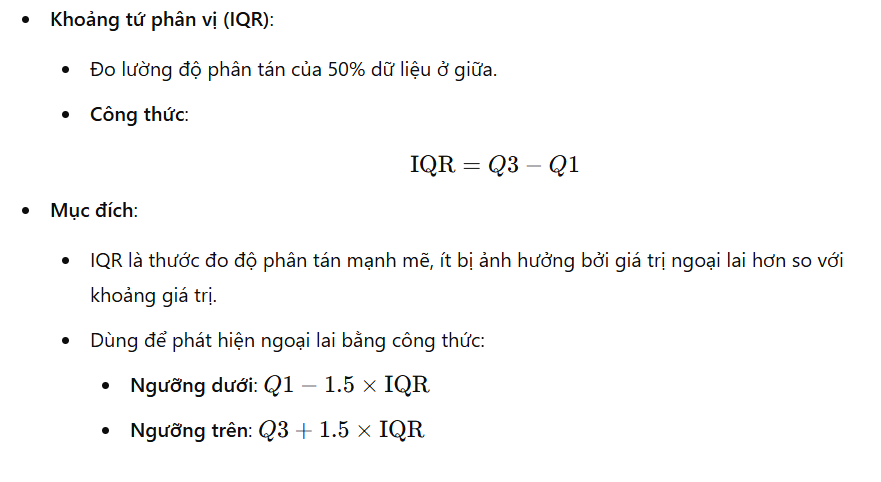

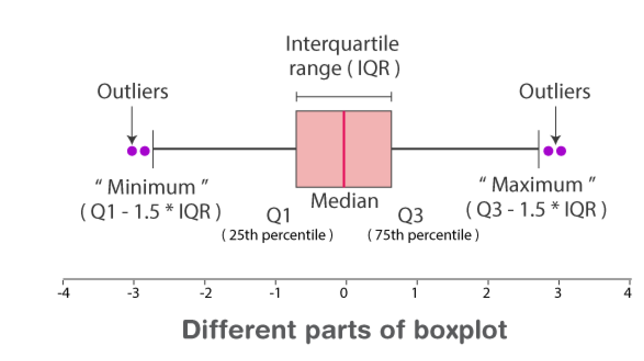
4. Mean, Mode và Median là gì?
+ Mean (Giá trị trung bình):
Trung bình cộng của tập dữ liệu.


+ Mục đích:
Tóm tắt xu hướng trung tâm của dữ liệu nhưng dễ bị ảnh hưởng bởi các giá trị ngoại lai (Ouliner).
+ Mode (Giá trị phổ biến nhất):
Giá trị xuất hiện thường xuyên nhất trong tập dữ liệu.
+ Mục đích:
Hữu ích trong dữ liệu phân loại và xác định giá trị phổ biến nhất trong tập dữ liệu.
+ Median (Trung vị):
Giá trị nằm giữa tập dữ liệu khi sắp xếp theo thứ tự tăng dần.
    Nếu số lượng là lẻ: Trung vị là giá trị ở giữa.
    Nếu số lượng là chẵn: Trung vị là trung bình cộng của hai giá trị ở giữa.
+ Mục đích:
Đưa ra giá trị trung tâm không bị ảnh hưởng bởi giá trị ngoại lai.
- Tóm tắt
Phân phối: Mô tả cách dữ liệu được phân bố hoặc sắp xếp.
Khoảng giá trị: Chênh lệch giữa giá trị lớn nhất và nhỏ nhất, đo độ phân tán.
Tứ phân vị và IQR: Chia dữ liệu thành bốn phần bằng nhau; IQR đo mức độ phân tán của 50% dữ liệu ở giữa và giúp phát hiện ngoại lai.
Mean, Mode, Median: Các thước đo xu hướng trung tâm cung cấp cái nhìn về "trung tâm" hoặc các giá trị phổ biến nhất của dữ liệu.
Những khái niệm này là cơ sở quan trọng để hiểu hình dạng, trung tâm, và độ phân tán của bất kỳ tập dữ liệu nào trong phân tích dữ liệu khám phá.

## Check for missing values
Why? Missing values is number one problem with a dataset because it affects almost every aspect of your downstream analysis. For example:

1. Missing values can affect all your descriptive statistics (think about how missing values can affect the "mode" of a column)
2. Missing values would also affect the quality (generalization) of predictive models
- missing value ảnh hưởng nhiều nhất đến mode nên phải chú ý


In [48]:
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Only "bmi" has some missing values. Let's see the percentage of missing values for "bmi"

In [49]:
# Ratio of missing null values
# (number of missing BMI values ) / (number of rows)
(stroke_data["bmi"].isnull().sum()/stroke_data.shape[0]) * 100

3.9334637964774952

Ratio of missing values of bmi is 3.93%
- Optional: create a new dataframme with missing value counts to plot. There are other ways to visualize this statistics, this is just to practice dataframe manipulation)

In [50]:
missing_data_count = {'Missing': [stroke_data["bmi"].isnull().sum()], 'Not Missing': [stroke_data["bmi"].notnull().sum()]}
missing_bmi = pd.DataFrame(data=missing_data_count)

In [51]:
missing_bmi

,Missing,Not Missing
0,201,4909


<Axes: >

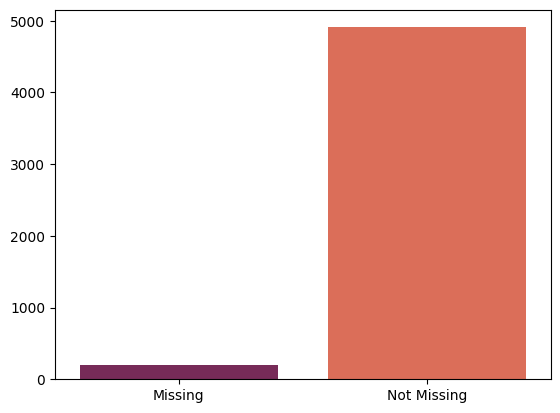

In [52]:
# Plotting the missing values
sns.barplot(data=missing_bmi , palette="rocket")

### Dealling with Categorical and Numerical Variables

col_names() - This a function created to get the columns names that has categorical and numerical data separately (Đây là hàm được tạo để lấy tên cột có dữ liệu phân loại và số riêng biệt)

In [53]:
def col_names(df):
    # Get categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    # Get numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    # Get Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    # num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
    return num_cols, cat_cols

In [54]:
numerical_cols, categorical_cols = col_names(stroke_data)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


### Analysing Numerical Attributes

In [55]:
# what are the columns of table below
stroke_data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


<Axes: xlabel='age', ylabel='Count'>

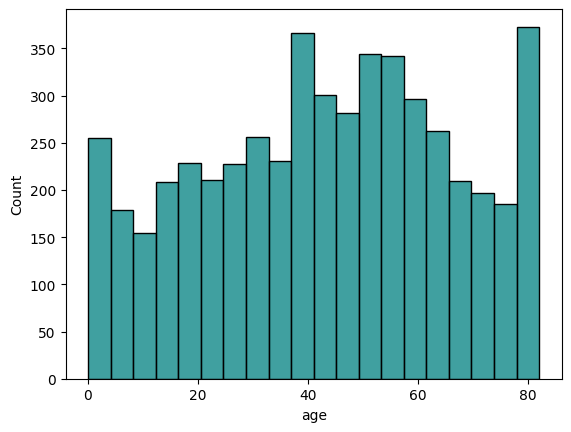

In [56]:
# Visuealize each attribute
sns.histplot(x=stroke_data["age"], data=stroke_data, color="teal")

**Exercises:**
- Can you plot the histograms of other numerical columns?
- Can you show the plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row?
- Can you show customize the axes of the plots to show "Age" , "Average Gluscose Level", "BMI" on the x-axes?
- References:
  - https://seaborn.pydata.org/generated/seaborn.histplot.html
  - https://www.w3schools.com/python/matplotlib_histograms.asp  



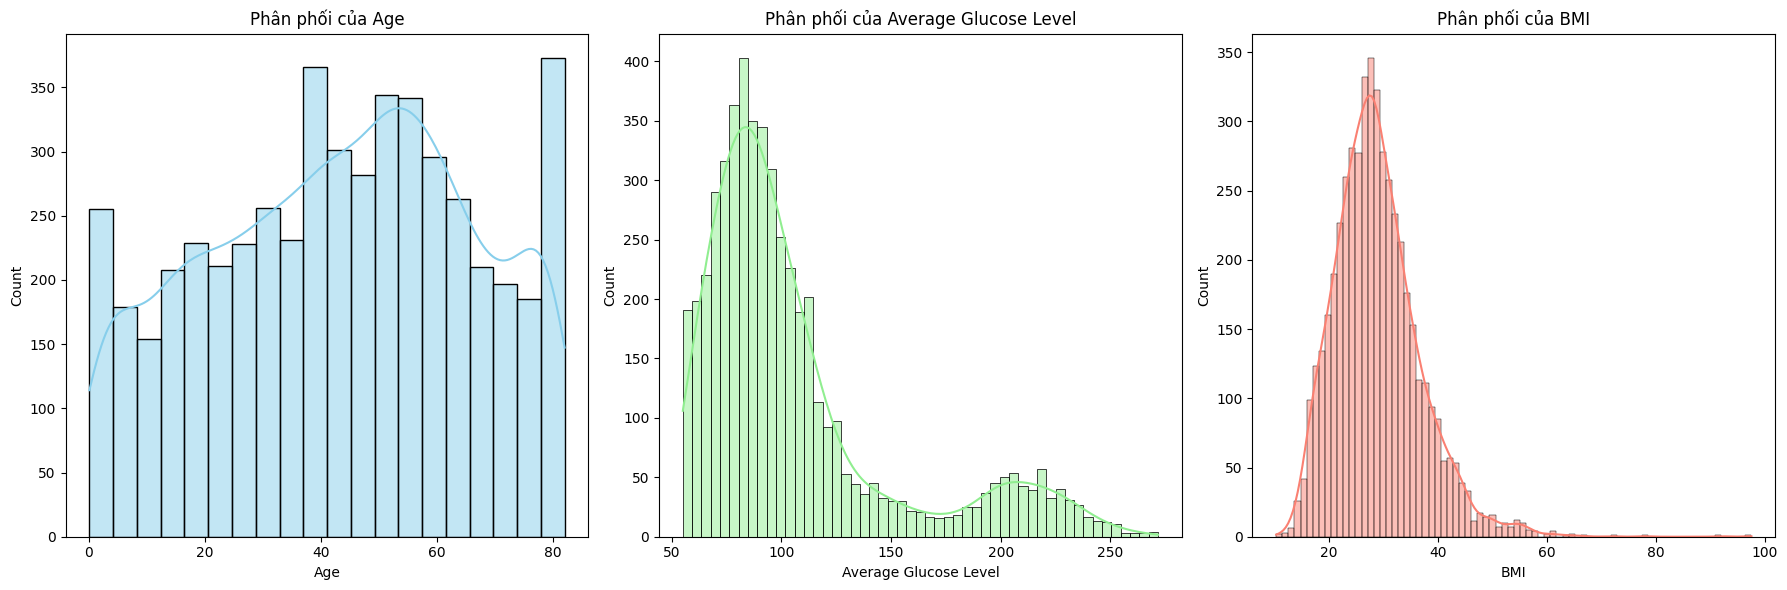

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử dữ liệu được tải vào một DataFrame có tên là `stroke_data`
stroke_data
# Tạo các subplot (3 biểu đồ trong cùng một hàng)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Biểu đồ cho "age"
sns.histplot(stroke_data['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Phân phối của Age')
axes[0].set_xlabel('Age')
# Biểu đồ cho "avg_glucose_level"
sns.histplot(stroke_data['avg_glucose_level'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Phân phối của Average Glucose Level')
axes[1].set_xlabel('Average Glucose Level')
# Biểu đồ cho "bmi"
sns.histplot(stroke_data['bmi'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Phân phối của BMI')
axes[2].set_xlabel('BMI')
# Điều chỉnh layout để các biểu đồ không bị chồng lên nhau
plt.tight_layout()
plt.show()


## Check for Outliers
Outliers are another "defect" in the data that need "correction":
- Outliers can significantly affect some statistics of a distribution, which can affect both your interpretations + how you fix missing data. Can you figure out why is that so?
- Outliers can significantly affect predictive models. Can you figure out why it is so?

- plot box dùng ktra ouliers


- Outliers là gì?
- Outliers (dữ liệu ngoại lai) là những điểm dữ liệu khác biệt rõ rệt so với phần còn lại của tập dữ liệu. Chúng có thể là những giá trị cực kỳ cao hoặc thấp, không phù hợp với xu hướng chung của dữ liệu. Việc xác định và xử lý outliers là rất quan trọng trong phân tích dữ liệu, vì chúng có thể làm sai lệch hoặc biến dạng nhiều yếu tố trong mô hình thống kê và học máy.

- Tại sao Outliers lại ảnh hưởng đến Thống Kê và Giải Thích Dữ Liệu?
+ Outliers có thể ảnh hưởng đáng kể đến các thống kê và cách giải thích dữ liệu

- Kết Luận
    Outliers có thể ảnh hưởng đến cả thống kê và các mô hình dự báo theo những cách quan trọng:

    Chúng có thể làm sai lệch các thước đo như trung bình, phương sai, và giả thuyết phân phối chuẩn trong phân tích thống kê, dẫn đến kết luận sai hoặc giải thích sai dữ liệu.
    Trong mô hình dự báo, outliers có thể làm sai lệch các tham số mô hình, gây ra hiện tượng overfitting và dự báo không chính xác, đặc biệt đối với các thuật toán nhạy cảm với phân phối dữ liệu.
    Do đó, việc xác định và xử lý outliers là bước quan trọng để đảm bảo độ chính xác và độ tin cậy của cả phân tích thống kê và mô hình học máy.

<Axes: xlabel='bmi'>

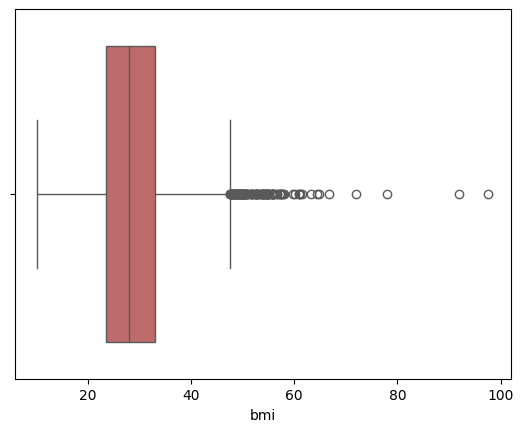

In [58]:
# Checking for outliers of "BMI"
sns.boxplot(x=stroke_data["bmi"], data=stroke_data, color="indianred")

What do the box, "whiskers", and dots indicate?

**Exercises:**
- Can you plot the histograms of other numerical columns?
- Can you show the box plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row, each plot is vertically-oriented instead of the default horizontal orientation
- References:
  - https://seaborn.pydata.org/generated/seaborn.boxplot.html
  - https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

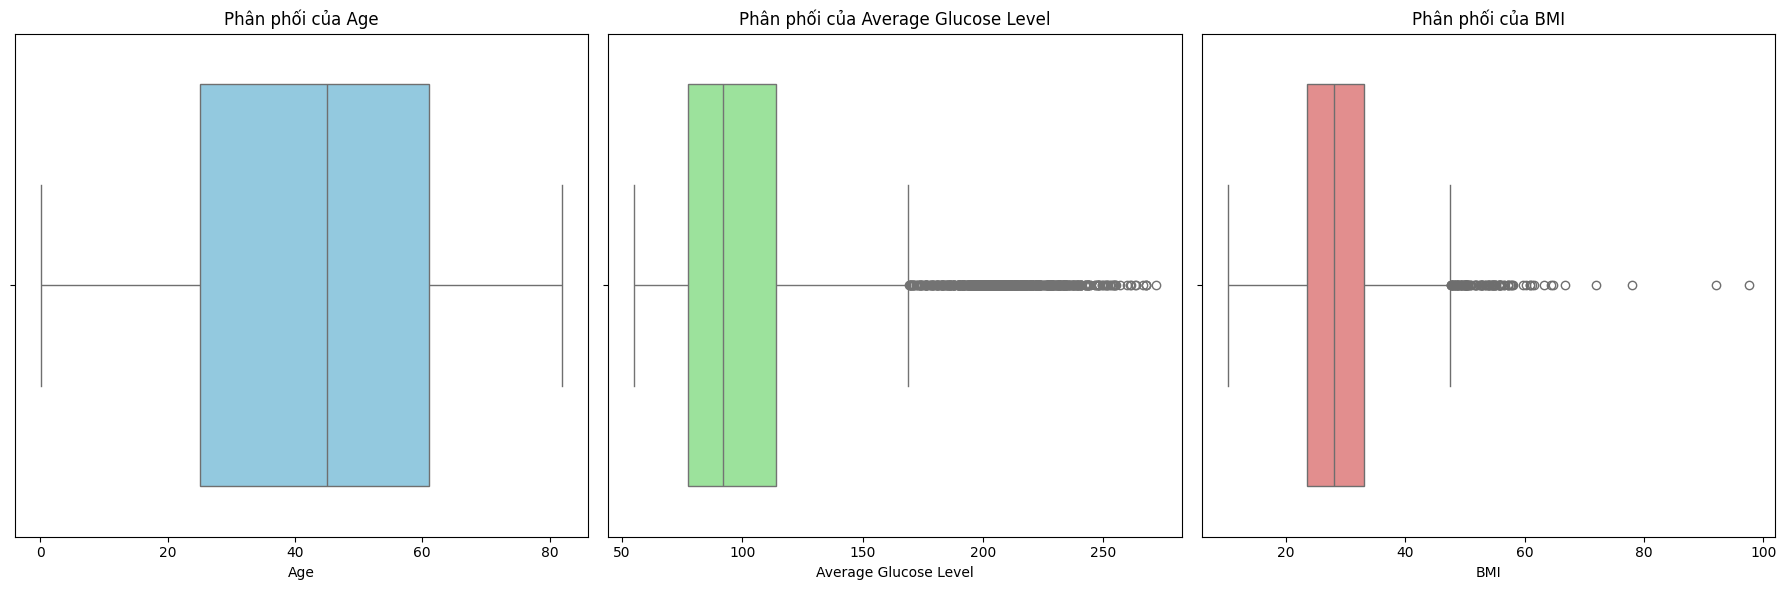

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử 'stroke_data' là dataframe
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ hộp cho 'age', 'avg_glucose_level', và 'bmi' với hướng dọc
sns.boxplot(x=stroke_data['age'], ax=axes[0], color='skyblue')
axes[0].set_title('Phân phối của Age')
axes[0].set_xlabel('Age')

sns.boxplot(x=stroke_data['avg_glucose_level'], ax=axes[1], color='lightgreen')
axes[1].set_title('Phân phối của Average Glucose Level')
axes[1].set_xlabel('Average Glucose Level')

sns.boxplot(x=stroke_data['bmi'], ax=axes[2], color='lightcoral')
axes[2].set_title('Phân phối của BMI')
axes[2].set_xlabel('BMI')

# Điều chỉnh layout
plt.tight_layout()
plt.show()


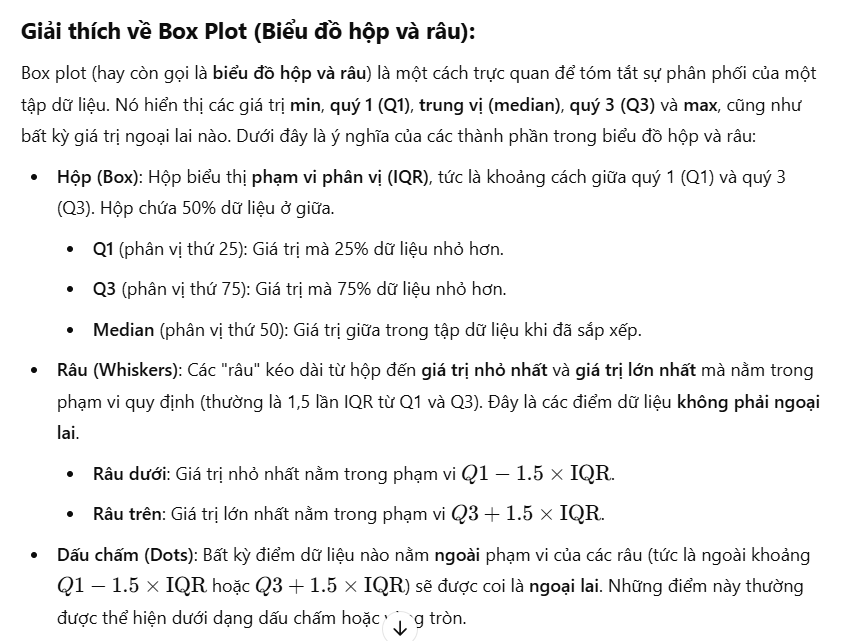

#### [Extra] Checking for Outliers in Numerical Attributes

IQR (Interqartile range) is being used to check for outliers. There are other methods to do this, this snippet is mainly to practice the concept of functions in Python.

check_outliers() -  This function will return the columns with outliers

In [60]:
def check_outliers(df, numerical_cols, iqr=1.5, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + iqr * interquantile
        low_limit = q1 - iqr * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [61]:
outlier_cols = check_outliers(stroke_data, ['age'])

There is no outliers


Exercises: Can you update the function call above to check for outliers for all numerical columns?

In [62]:
# Lấy danh sách các cột số từ DataFrame
numerical_cols = stroke_data.select_dtypes(include=['float64', 'int64']).columns
# Gọi hàm check_outliers cho tất cả các cột số
outlier_cols = check_outliers(stroke_data, numerical_cols)
# Hiển thị các cột có giá trị ngoại lai
print(outlier_cols)


['hypertension', 'heart_disease', 'bmi', 'stroke']


### Analysing Categorical Attributes

[Text(0.5, 1.0, 'work_type')]

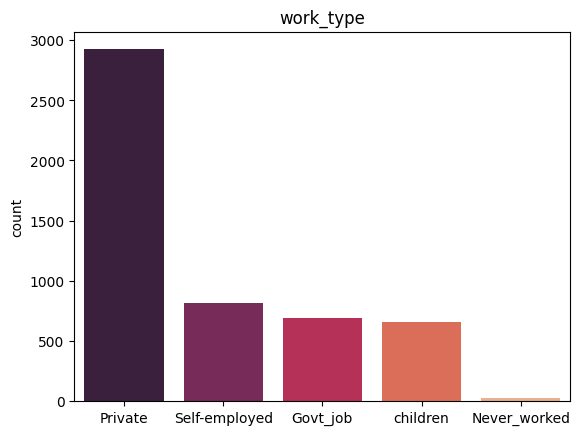

In [63]:
sns.barplot(x = stroke_data["work_type"].unique(), y = stroke_data["work_type"].value_counts(), palette="rocket").set(title="work_type")

### Analysing Target Variable

[Text(0.5, 1.0, 'Stroke')]

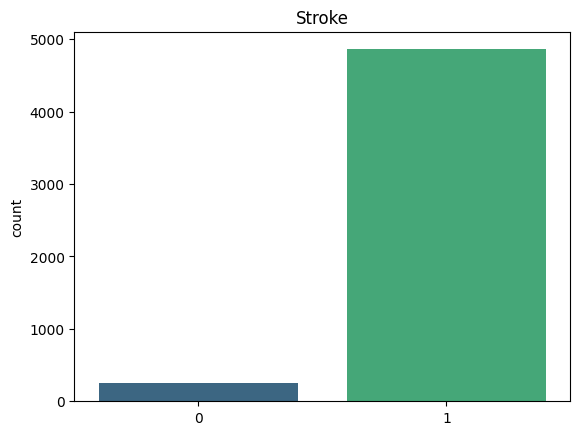

In [64]:
# Get stroke counts and plot
stroke_data["stroke"].value_counts()
sns.barplot(x = stroke_data["stroke"].unique(), y = stroke_data["stroke"].value_counts(), palette="viridis").set(title="Stroke")

([<matplotlib.patches.Wedge at 0x7988c0d3b3a0>,
 [Text(-1.0871361453364168, 0.16773491438301516, '1'),
  Text(1.087136143373357, -0.1677349271061446, '0')])

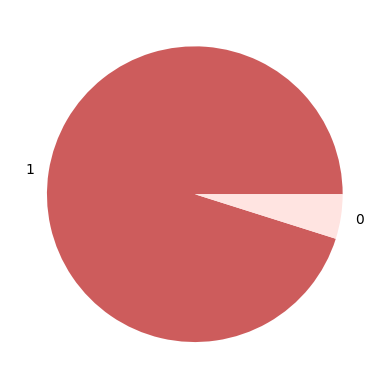

In [65]:
# Plot as percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=[1,0], colors=["indianred", "mistyrose"])

Ratio of 1s is 95.1%

**Exercises**

- Can you update the labels to "Stroke" and "No stroke" instead of "0" and "1"?
- Can you comment on the distribution of "Stroke" vs "No stroke" labels, how would this affect your predictive model?


([<matplotlib.patches.Wedge at 0x7988b46778b0>,
 [Text(-1.0871361453364168, 0.16773491438301516, 'Stroke'),
  Text(1.087136143373357, -0.1677349271061446, 'No Stroke')])

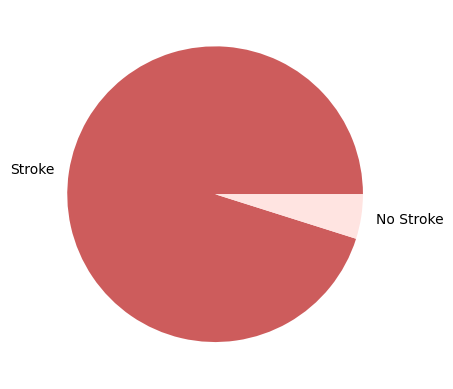

In [66]:
# Plot as percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=["Stroke","No Stroke"], colors=["indianred", "mistyrose"])

# More advanced analytics

Often time, the intention of (3) Exploratory Data Analytics is to help you better shape your (2) Formulate Data Questions (Hypothesis). What we are looking for in this step is often the relationship between variables, more specifically the relationship between predictors (indepdendent variables) and the predicted (dependent variables).
- More often than not, we can draw significant insights from this step without any sophisticated predictive modeling, especially when data is limited.
- Even if you can use predictie modelling, these insights might be used to answer (to some extent) the questions of which factors are more influential in predicting certain variable, why these factors are more important etc. These questions are often more important (and more difficult) than being able to predict certain variables accurately.

## Correlation between numerical columns
- **tương quan(corelation) gián tiếp dẫn đến kq**
- **nguyên nhân: trực tiếp dẫn đến kq** **văn bản in đậm**

<Axes: >

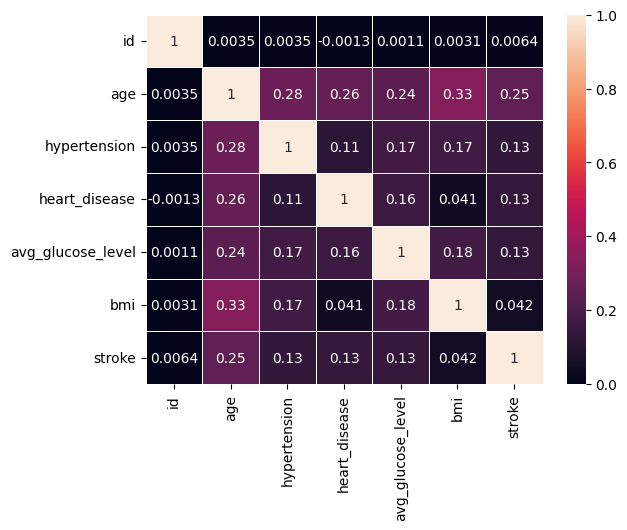

In [67]:
sns.heatmap(stroke_data[numerical_cols].corr(), annot=True, linewidths=0.5,)

**Exercises**
- What is correlation coefficient? How is it computed and why it is important?
- Why we only compute corellation coefficients between numerical variables?
- Why is it important (or may not be important) to consider correlation between varibles? See here https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/



- **Hệ số tương quan** là một chỉ số thống kê đo lường mức độ mà hai biến có mối quan hệ với nhau. Nó cho thấy sức mạnh và hướng đi của mối quan hệ giữa chúng. Hệ số tương quan phổ biến nhất là hệ số tương quan Pearson.
- Các Loại Hệ Số Tương Quan:
    Tương quan dương (+1): Khi một biến tăng, biến kia cũng tăng.
    Tương quan âm (-1): Khi một biến tăng, biến kia giảm.
    Không có tương quan (0): Không có mối quan hệ giữa hai biến.    
- Tại Sao Hệ Số Tương Quan Quan Trọng?
    Hiểu Mối Quan Hệ: Hệ số tương quan giúp ta hiểu mức độ mà hai biến có mối quan hệ với nhau, giúp xác định sự phụ thuộc hoặc không phụ thuộc giữa các biến.
    Mô Hình Dự Đoán: Trong các mô hình dự đoán, việc biết các biến có mối quan hệ như thế nào giúp chọn lựa các đặc trưng (features) có tương quan mạnh với biến mục tiêu.
    Phân Tích Dữ Liệu: Hệ số tương quan giúp xác định các xu hướng và mô hình trong dữ liệu, từ đó giúp đưa ra quyết định chính xác hơn.
    Kinh Tế và Kinh Doanh: Trong các lĩnh vực như tài chính, marketing, y tế, việc phân tích tương quan giúp hiểu rõ hơn về mối quan hệ giữa các yếu tố như giá cả và doanh thu, hoặc tuổi tác và các bệnh lý.
  - Tại Sao Chỉ Tính Hệ Số Tương Quan Giữa Các Biến Số?

** Hệ số tương quan chỉ có ý nghĩa với các biến số vì nó đo lường mức độ và hướng đi của mối quan hệ giữa hai biến số. Dưới đây là lý do:

    Bản Chất Của Tương Quan: Hệ số tương quan đo lường mức độ mà một biến thay đổi khi biến kia thay đổi. Điều này chỉ có thể thực hiện với các giá trị số, nơi các phép toán như cộng, trừ, nhân, chia có ý nghĩa.
    Biến Danh Mục: Đối với các biến danh mục (ví dụ: "Nam", "Nữ" hoặc "Công ty tư nhân", "Công ty nhà nước"), ta không thể tính được một "khoảng cách" hay "sự khác biệt" giữa các danh mục như với các giá trị số. Tương quan chỉ có ý nghĩa đối với dữ liệu có kiểu số học, trong đó mỗi giá trị có thể đo lường và sắp xếp được.
    Đối với dữ liệu danh mục, các phương pháp khác như Kiểm định Chi-square, Cramér's V, hoặc Tương quan Point-Biserial (cho mối quan hệ giữa biến nhị phân và biến số liên tục) sẽ phù hợp hơn.
- Tại Sao Nó Quan Trọng:
    Phát Hiện Multicollinearity trong Mô Hình
    Chọn Lọc Đặc Trưng (Feature Selection)
    Tăng Cường Sức Mạnh Dự Đoán
    Đánh Giá Rủi Ro:
- Tại Sao Có Thể Không Quan Tâm
    Mối Quan Hệ Phi Tuyến Tính:Hệ số tương quan chỉ đo lường mối quan hệ tuyến tính. Nếu có một mối quan hệ phi tuyến giữa hai biến, hệ số tương quan có thể không có ý nghĩa.
    Tương Quan Giả Tạo (Spurious Correlation):Đôi khi, hai biến có thể có vẻ như có tương quan, nhưng thực chất là do một biến thứ ba ảnh hưởng đến cả hai biến đó, hiện tượng này được gọi là tương quan giả tạo. Trong trường hợp này, tương quan có thể gây hiểu lầm
    Không Có Mối Quan Hệ Nhân Quả
    Overfitting Trong Mô Hình Dự Đoán
- Tóm Tắt:
    Hệ số tương quan đo lường sức mạnh và hướng đi của mối quan hệ tuyến tính giữa hai biến. Nó được tính bằng cách sử dụng một công thức tính toán dựa trên hiệp phương sai của các biến và độ lệch chuẩn của chúng.
    Hệ số tương quan chỉ có ý nghĩa đối với các biến số, vì nó đo lường mối quan hệ tuyến tính giữa các giá trị số.
    Xem xét tương quan là quan trọng để phát hiện multicollinearity, cải thiện mô hình dự đoán và hiểu mối quan hệ giữa các biến. Tuy nhiên, nó cũng có thể không quan trọng nếu có mối quan hệ phi tuyến, tương quan giả tạo, hoặc thiếu tính nhân quả.

## Target Variable vs Numerical Attributes

In [68]:
for col in numerical_cols:
    print(stroke_data.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        hypertension
stroke              
0           0.088871
1           0.265060

        heart_disease
stroke               
0            0.047110
1            0.188755

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292

        stroke
stroke        
0          0.0
1          1.0



**Exercises**
- Can you visualize these results?
- What interpretation can you draw from these results?

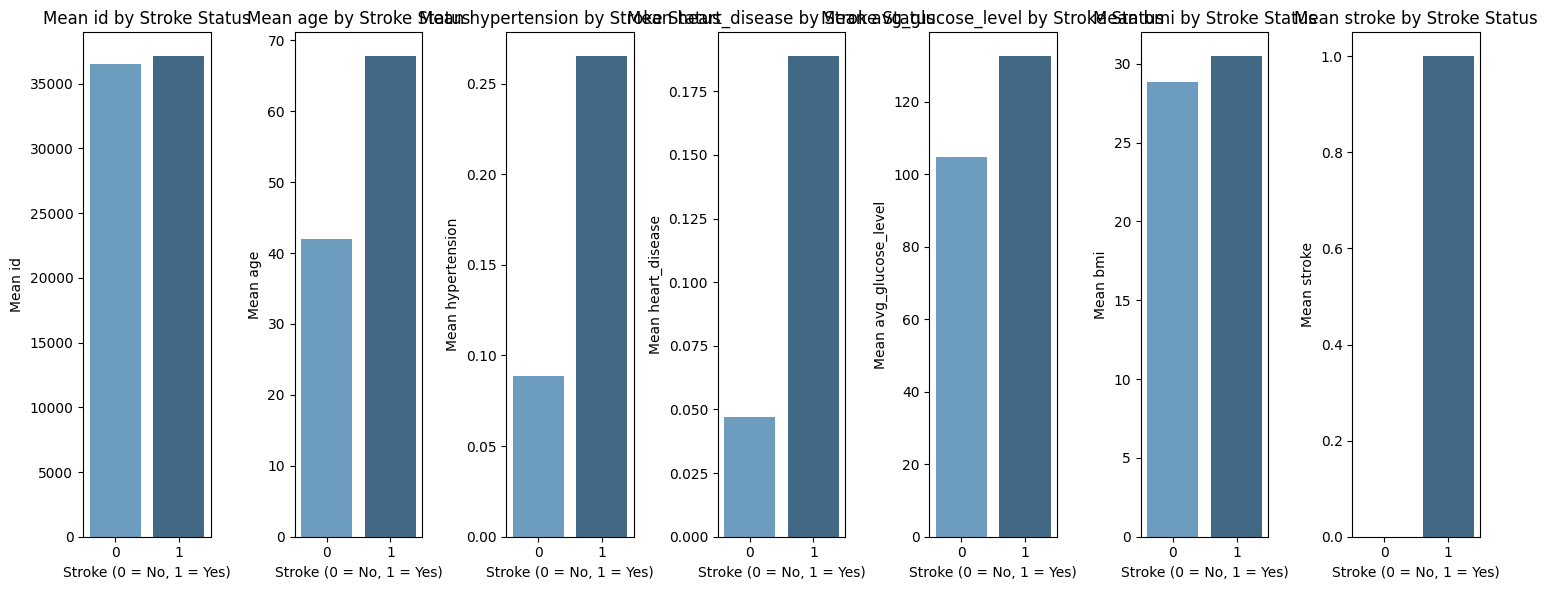

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# Đặt kích thước cho các biểu đồ
plt.figure(figsize=(15, 6))
# Tạo các biểu đồ phụ cho từng cột số
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.barplot(x="stroke", y=col, data=stroke_data, ci=None, palette="Blues_d")
    plt.title(f'Mean {col} by Stroke Status')
    plt.xlabel('Stroke (0 = No, 1 = Yes)')
    plt.ylabel(f'Mean {col}')
plt.tight_layout()
plt.show()


- Sau khi hiển thị kết quả, bạn có thể diễn giải các biểu đồ dựa trên những quan sát sau:

- Tuổi:

    Nếu giá trị trung bình của tuổi cao hơn ở bệnh nhân bị đột quỵ so với những người không bị đột quỵ, điều này có thể chỉ ra rằng người lớn tuổi có nguy cơ cao bị đột quỵ. Tuổi tác là một yếu tố nguy cơ quan trọng đối với đột quỵ.
- Mức Glucose Trung Bình:

    Nếu mức glucose trung bình cao hơn ở bệnh nhân bị đột quỵ so với bệnh nhân không bị đột quỵ, điều này cho thấy mức glucose cao có thể liên quan đến nguy cơ đột quỵ. Tiểu đường và mức glucose cao thường gắn liền với các vấn đề tim mạch và đột quỵ.
- Chỉ Số BMI:

    Nếu bệnh nhân bị đột quỵ có BMI trung bình cao hơn hoặc tương đương với bệnh nhân không bị đột quỵ, điều này có thể chỉ ra rằng béo phì hoặc thừa cân là yếu tố nguy cơ đối với đột quỵ. BMI cao thường liên quan đến huyết áp cao, tiểu đường và các bệnh lý tim mạch, tất cả đều có thể làm tăng nguy cơ đột quỵ.
  - Thông qua việc hiển thị các mối quan hệ này, bạn có thể hiểu rõ hơn về những yếu tố có thể góp phần vào nguy cơ đột quỵ trong bộ dữ liệu này.

## Target Variable vs Categorical Attributes

**Exercises**
- Can you repeat the computation above for categorical columns?
- Can you also plot the results?
- What insights can you draw from the results?

In [70]:
# Tính toán tỷ lệ cho các cột danh mục
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Tính toán và in kết quả
for col in categorical_cols:
    print(stroke_data.groupby("stroke")[col].value_counts(normalize=True), end="\n\n")


stroke  gender
0       Female    0.586916
        Male      0.412878
        Other     0.000206
1       Female    0.566265
        Male      0.433735
Name: proportion, dtype: float64

stroke  hypertension
0       0               0.911129
        1               0.088871
1       0               0.734940
        1               0.265060
Name: proportion, dtype: float64

stroke  heart_disease
0       0                0.952890
        1                0.047110
1       0                0.811245
        1                0.188755
Name: proportion, dtype: float64

stroke  ever_married
0       Yes             0.644518
        No              0.355482
1       Yes             0.883534
        No              0.116466
Name: proportion, dtype: float64

stroke  work_type    
0       Private          0.571076
        Self-employed    0.155112
        children         0.140918
        Govt_job         0.128369
        Never_worked     0.004526
1       Private          0.598394
        Self-employed   

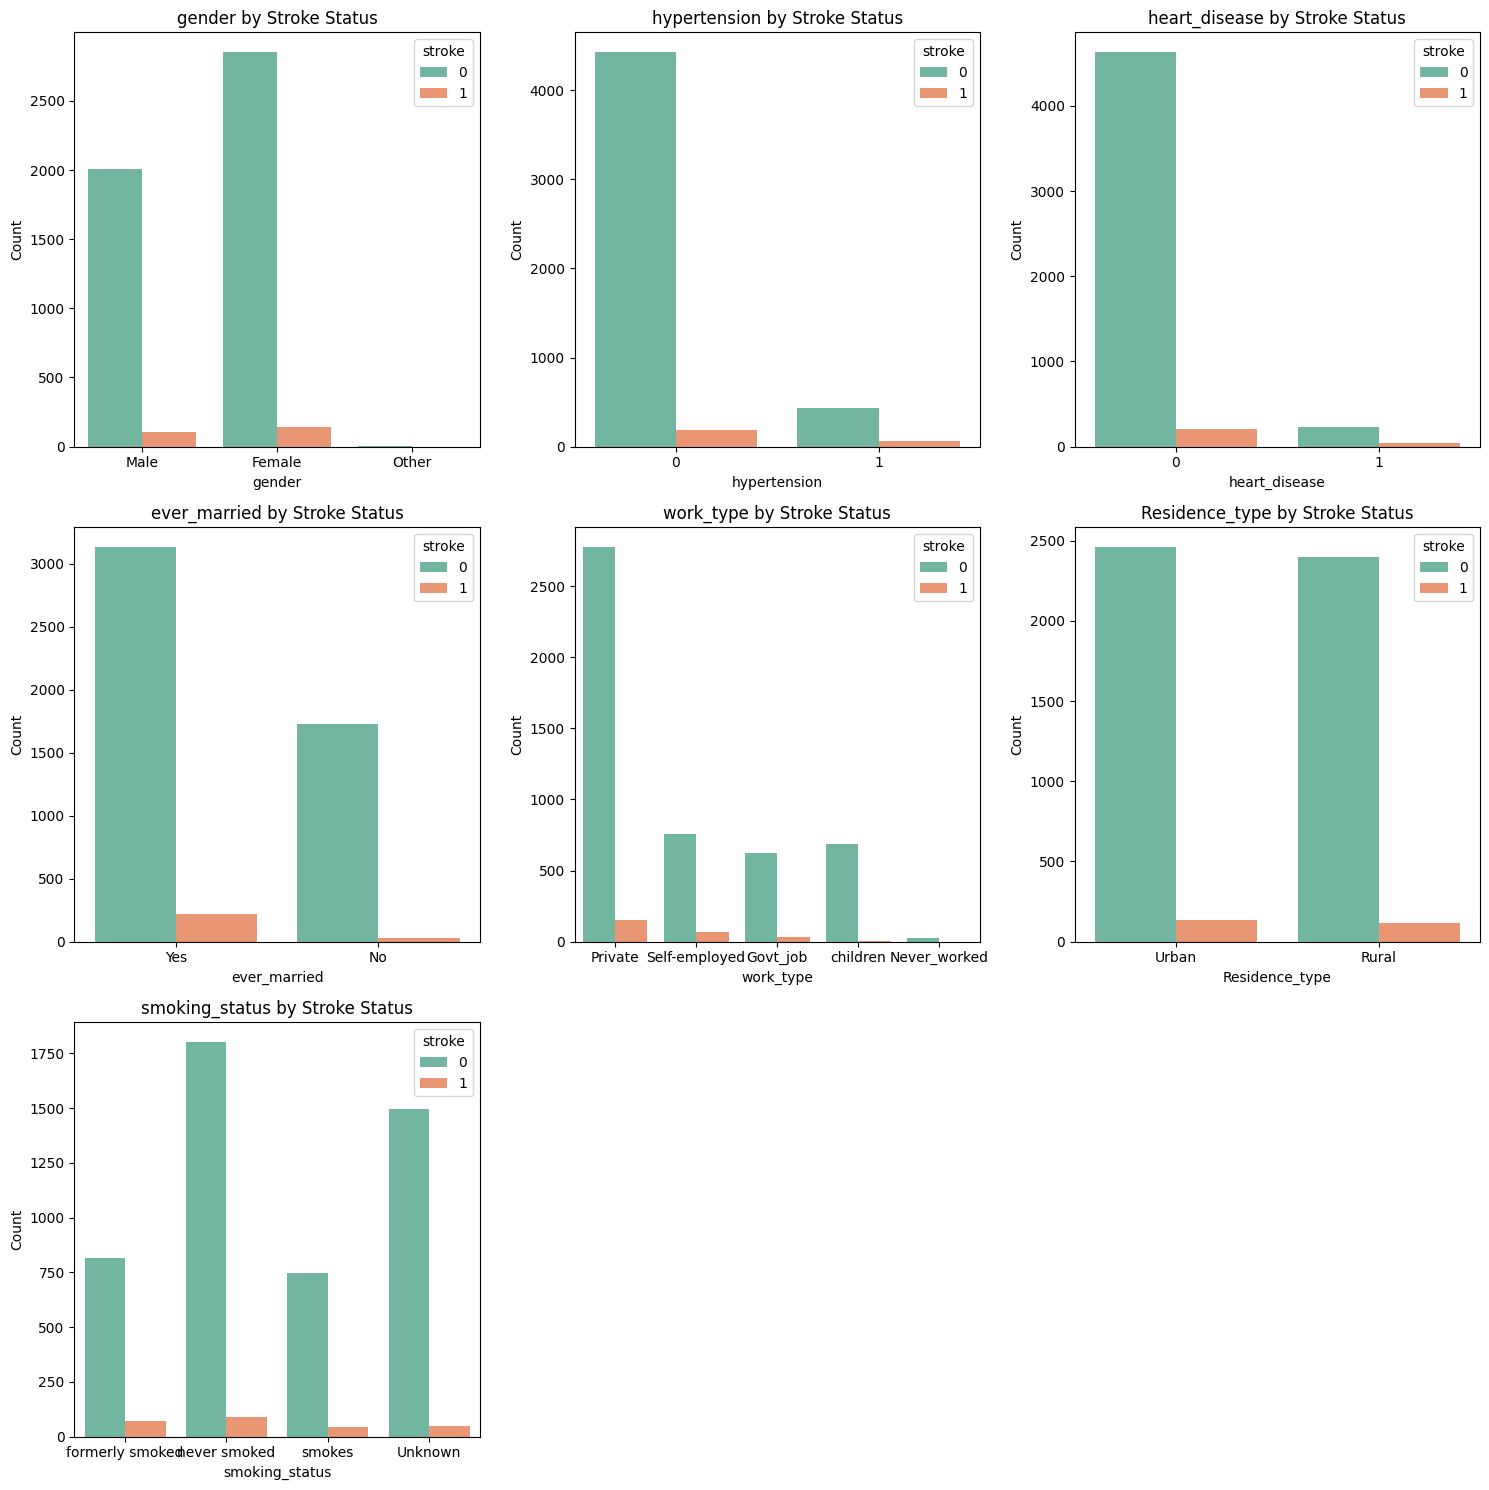

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Số lượng cột danh mục
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Tính toán số hàng và cột
n_cols = 3  # Ví dụ: số cột bạn muốn có trong mỗi hàng
n_rows = int(np.ceil(len(categorical_cols) / n_cols))  # Tính số hàng

# Đặt kích thước cho các biểu đồ
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Tạo biểu đồ cho mỗi cột danh mục
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Tạo số lượng hàng và cột phù hợp
    sns.countplot(x=col, hue="stroke", data=stroke_data, palette="Set2")
    plt.title(f'{col} by Stroke Status')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Diễn Giải Kết Quả
Sau khi vẽ biểu đồ, bạn có thể rút ra các nhận xét từ các biểu đồ này:

- Giới Tính (gender):

    Nếu tỷ lệ nam giới bị đột quỵ cao hơn so với nữ giới, có thể cho thấy rằng nam giới có nguy cơ bị đột quỵ cao hơn trong bộ dữ liệu này. Tuy nhiên, cần kiểm tra thêm các yếu tố khác như tuổi tác và bệnh lý đi kèm.
- Tăng Huyết Áp (hypertension):

    Nếu bệnh nhân có tăng huyết áp có tỷ lệ đột quỵ cao hơn, điều này chỉ ra rằng tăng huyết áp là một yếu tố nguy cơ quan trọng đối với đột quỵ. Huyết áp cao có thể làm tăng nguy cơ đột quỵ do tác động lên hệ thống mạch máu và tim.
- Bệnh Tim (heart_disease):

    Nếu bệnh nhân có bệnh tim có tỷ lệ đột quỵ cao hơn, điều này cho thấy bệnh tim cũng là một yếu tố nguy cơ mạnh mẽ đối với đột quỵ. Các bệnh tim mạch làm tăng khả năng bị đột quỵ do thiếu máu hoặc cục máu đông.
- Tình Trạng Kết Hôn (ever_married):

    Nếu bệnh nhân đã kết hôn có tỷ lệ đột quỵ cao hơn hoặc thấp hơn so với những người chưa kết hôn, đây có thể là một yếu tố xã hội hoặc tâm lý liên quan đến tình trạng sức khỏe, cần phân tích thêm.
- Loại Công Việc (work_type):

    Nếu những người làm việc trong môi trường văn phòng (Private, Govt_job) có tỷ lệ đột quỵ cao hơn, điều này có thể chỉ ra rằng lối sống ít vận động có thể là một yếu tố nguy cơ đối với đột quỵ. Ngược lại, người lao động trong lĩnh vực tự làm việc hoặc chưa từng làm việc có thể có tỷ lệ đột quỵ thấp hơn.
- Loại Nơi Cư Trú (Residence_type):

    Nếu tỷ lệ đột quỵ cao hơn ở khu vực thành thị (Urban), điều này có thể phản ánh những yếu tố môi trường như ô nhiễm không khí, căng thẳng và lối sống không lành mạnh, trong khi ở khu vực nông thôn có thể ít bị ảnh hưởng bởi những yếu tố này.
- Tình Trạng Hút Thuốc (smoking_status):

    Nếu tỷ lệ đột quỵ cao ở những người hút thuốc, đây có thể là một yếu tố nguy cơ rõ ràng, vì việc hút thuốc có liên quan trực tiếp đến các vấn đề tim mạch và đột quỵ.
**Tóm lại, việc phân tích và trực quan hóa các cột danh mục giúp bạn nhận diện được các yếu tố nguy cơ tiềm ẩn đối với đột quỵ trong nhóm dữ liệu này và có thể giúp đưa ra các chính sách hoặc can thiệp y tế hiệu quả hơn.